In [1]:
#Import useful libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
#load dataset used for analysis
dtypes = {"id":'str',"timestamp":'str',"longitude":'float',"latitude":'float',"annotation":'str'}
data = pd.read_csv("ais_brest_synopses.csv",usecols=["id","timestamp","longitude","latitude","annotation"],dtype=dtypes)

In [3]:
#Counting Base Annotation
annotation_simple_dict = {
    "10000000": 0,
    "01000000": 0,
    "00100000": 0,
    "00010000": 0,
    "00001000": 0,
    "00000100": 0,
    "00000010": 0,
    "00000001": 0
}
#Count type of Annotation
most_frequent=data["annotation"].value_counts()

#Convert to dict
most_dict=most_frequent.to_dict()
list_value = list(most_dict.values())
#Count single annotation
j = 0
for key in most_dict.keys():
    i = 0
    for element in key:
        if element == '1':
            list_key = list(annotation_simple_dict.keys())
            annotation_simple_dict[list_key[i]] += list_value[j]
        i += 1
    j += 1  
annotation_simple_dict

{'10000000': 776041,
 '01000000': 780440,
 '00100000': 3669276,
 '00010000': 96463,
 '00001000': 159126,
 '00000100': 162119,
 '00000010': 372104,
 '00000001': 390809}

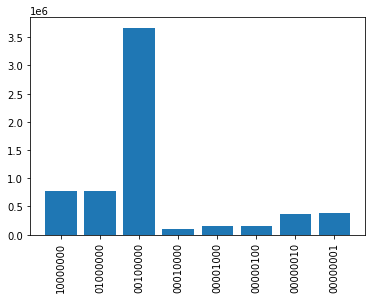

In [4]:
#ANNOTATION BASE
#Counting Annotation base
plt.bar(x=annotation_simple_dict.keys(),height=list(annotation_simple_dict.values()))
plt.xticks(rotation=90)
plt.show()

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data.head(5)

,id,timestamp,longitude,latitude,annotation,month,year
0,228854000,2015-09-30 22:00:01,-4.347263,48.118046,00010000,9,2015
1,245257000,2015-09-30 22:00:02,-4.465718,48.382490,00010000,9,2015
2,227705102,2015-09-30 22:00:03,-4.496571,48.382420,00010000,9,2015
3,228131600,2015-09-30 22:00:04,-4.644325,48.092247,00010000,9,2015
4,228051000,2015-09-30 22:00:05,-4.485108,48.381320,00010000,9,2015


In [3]:
#COUNT EVENT for each Month
#month_analysis= data[['annotation', 'month','year']].groupby(['month'])['annotation'].count().reset_index(name='count_annotation')
month_analysis= data[['annotation', 'month','year']].groupby(['month','year']).agg('count')
month_analysis
month_analysis.plot(xlabel='month,year',kind='bar',width=0.8)

KeyError: "['year', 'month'] not in index"

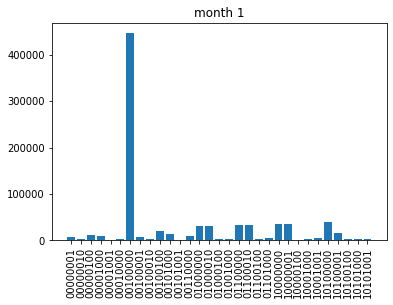

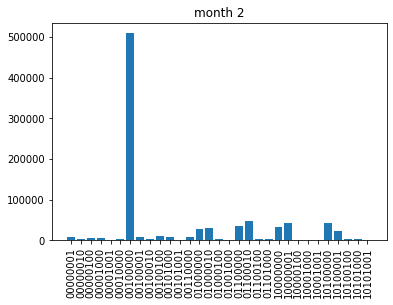

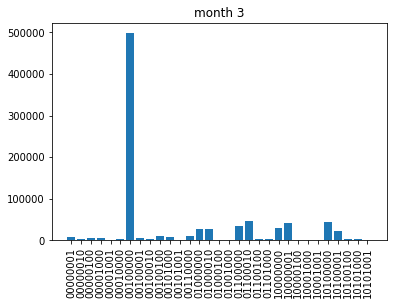

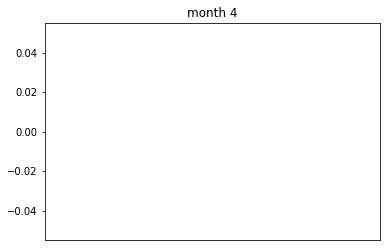

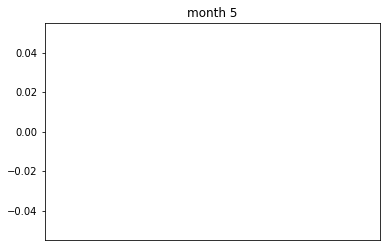

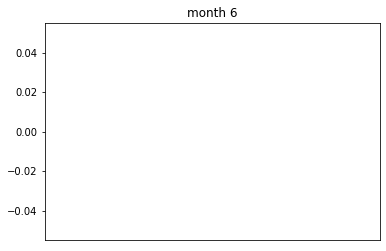

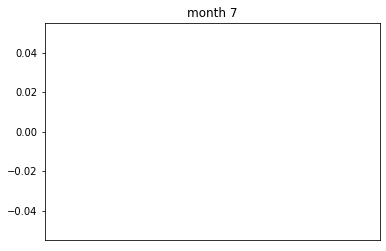

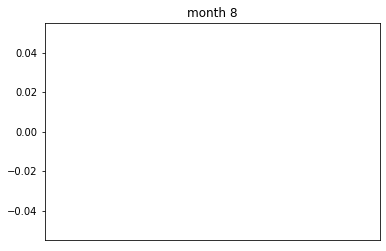

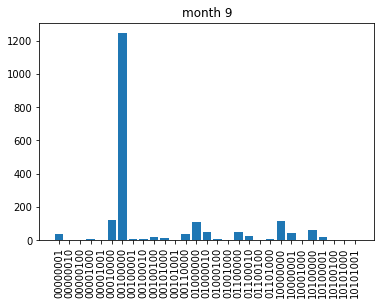

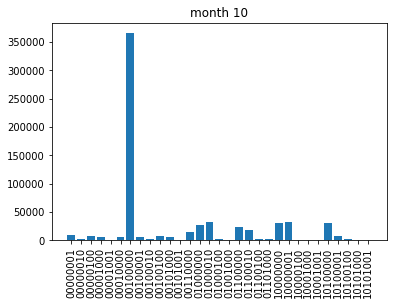

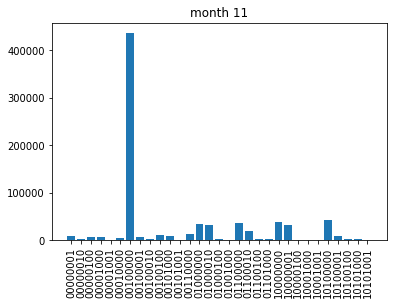

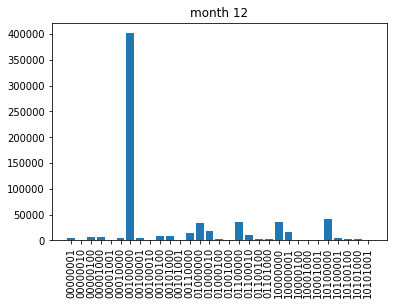

In [8]:
#COUNT EACH ANNOTATION FOR EACH MONTH
#month_analysis_annotation= data[['annotation','month']].groupby(['month']).agg(['annotation']).reset_index(name='count')
month_analysis_annotation=data.groupby(['month','annotation'])['annotation'].count().reset_index(name='count')
month_analysis_annotation
for i in range(1,13):
    name="month "+str(i)
    plt.figure()
    plt.title(name)
    df_monthly = month_analysis_annotation[month_analysis_annotation['month'] == i] # select dataframe with month = i
    plt.bar(df_monthly['annotation'], df_monthly['count'])
    plt.xticks(df_monthly['annotation'].unique(),rotation=90) # set x axis 
#month_analysis_annotation.plot.bar(xlabel=['annotation'],subplots=True,)

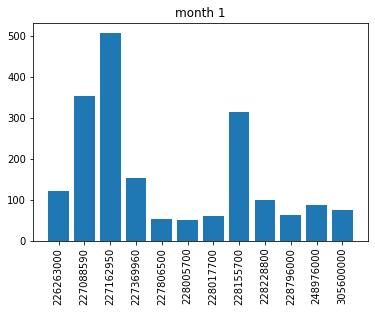

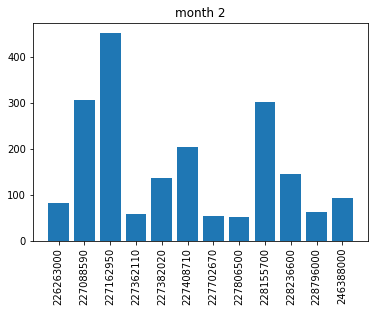

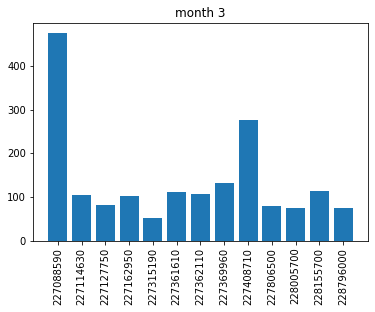

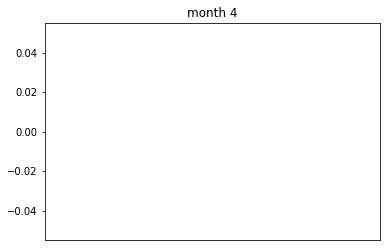

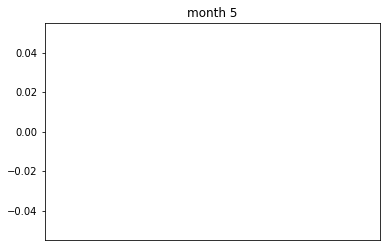

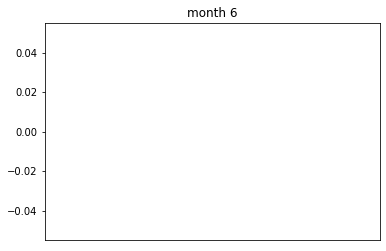

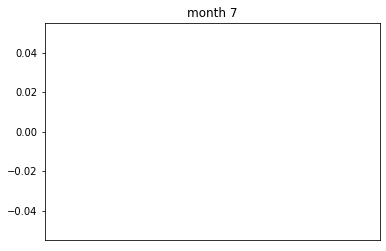

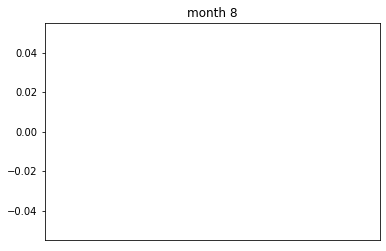

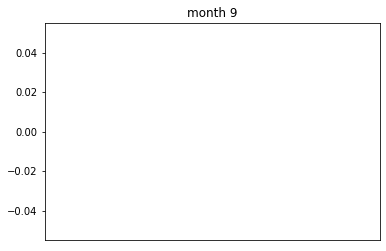

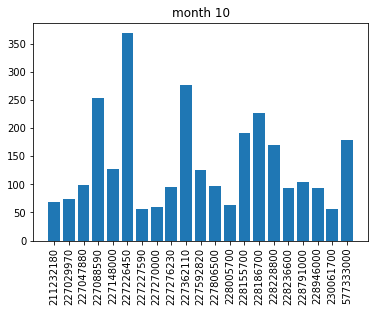

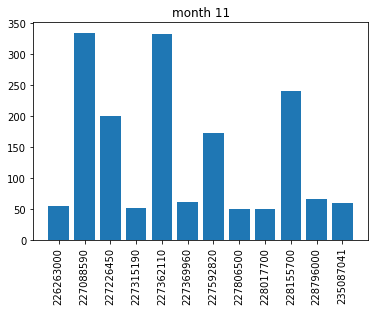

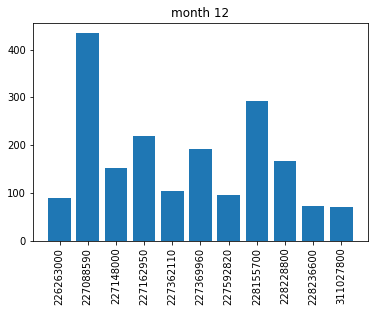

In [6]:
#GAP ANALYSIS ANNOTATION
#month_analysis_annotation= data[['annotation','month']].groupby(['month']).agg(['annotation']).reset_index(name='count')
gap_analysis =data.query('annotation == "00010000"')
gap_analysis_annotation=gap_analysis.groupby(['month','id'])['annotation'].count().reset_index(name='count')
gap_analysis_annotation= gap_analysis_annotation.query('count >= 50')

for i in range(1,13):
    name="month "+str(i)
    plt.figure()
    plt.title(name)
    df_monthly = gap_analysis_annotation[gap_analysis_annotation['month'] == i] # select dataframe with month = i
    plt.bar(df_monthly['id'], df_monthly['count'])
    plt.xticks(df_monthly['id'].unique(),rotation=90) # set x axis 
#month_analysis_annotation.plot.bar(xlabel=['annotation'],subplots=True,)

<AxesSubplot:xlabel='month,year'>

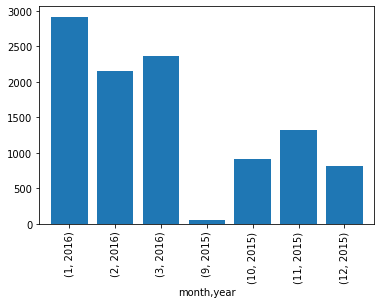

In [9]:
#EVALUATE OF maritime traffic in a certain area evaluated for every month included in dataset
traffic= data[['month','year','longitude','latitude']].query('longitude >= -4.46 and longitude <=-4.44 and latitude >= 48 and latitude <=48.15').groupby(['month','year'])['month'].agg('count')
traffic
traffic.plot(x='month,year',kind='bar',width=0.8)